<a href="https://colab.research.google.com/github/kjm12misa/Google_drive/blob/main/Python/chapter_9_1~2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter.9_1

### 순차 데이터와 순환 신경망
- 초급 레벨 : 기초통계(t.test, 분산분석, 회귀분석 등)
- 중급 레벨 : **시계열 분석**/베이지안(?)/비모수검정(?)
 + 시계열 데이터 : 주식, 날씨, 매장 매출

----> R로 공부 추천

### 텍스트
- 텍스트 마이닝 (데이터 분석가)
 + 대표적으로 감정분석(긍정/부정 분류)
 + 문자열 : 인코딩하는 방법론이 존재
- 자연어 처리(개발자 해당)
 + 챗봇 (툴은 다 존재)
 + 자동 번역
- 기본 딥러닝 알고리즘/RNN&LSTM
 + 현실에서 쓰지 않음
 + 자료
 --> 딥러닝을 이용한 자연어 처리 입문 (텐서플로) : https://wikidocs.net/book/2155 : 08. 순환 신경망 파트만 맛보라.
 --> Pytorch로 시작하는 딥러닝 입문 : https://wikidocs.net/32471

#### p. 489~ 490
- 순환 신경망(재학습) : input layer에서 순환 말그대로 돌고 도니까~
 + c 13 -> 데이터(OA 출력, 다시 순환 OB 출력, 다시 순환...) ->... 이걸 순차적 데이터라고 부른다.
- 이미지
 --> 픽셀값이 어느정도 고정이 되어 있음
 --> 28 x 28로 정의/모든 데이터는 28 x 28 맞출 수 있음
- 텍스트
 --> 값의 고정이 불가
 --> 같은 의미

### Chapter.9_2(나와는 상관없는 일, 정보만 알아두기_딥러닝)
- 순환 신경망으로 IMDB 리뷰 분류
 + P.501
 + 주제 : 긍정리뷰 부정리뷰 분류
- RNN, LSTM 알고리즘
 + 자연어 처리와 관련된 많은 알고리즘은 영어로만 이루어짐.
 + 실무에서 성과를 내려면 제품을 사용(네이버)

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


- 데이터 크기 확인(1차원 배열)
 + 텍스트 길이가 다 다르기 때문에 1차원 배열로 정리 가능

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


- 이 수식은 문장의 길이가 다 다르다.

In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))
print(len(train_input[2]))

218
189
141


- Raw 데이터 전처리 -> 토큰화 작업이 끝난 상황(문자열 -> 숫자로 바뀜)
- imdb.load_data() 함수는 전체 어휘사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 (지정숫자)만큼 단어를 선택.
 + load_data(num_words=500) -> 앞에 불러올 데이터를 단어 500개로 지정.
 + num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있음. 따라서, 어휘사전에 없는 단어는 모두 2로 표시 되었다. 

In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 문제는 리뷰가 긍정인지 부정인지를 판단하는 것.
 + 그렇다면, 이건 이진 분류 문제로 볼 수 있어 타깃값이 0(부정)과 1(긍정)으로 나뉨.
 + 훈련세트와 검증세트로 나누자.

In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


- test_size = 0.2 --> 사이즈가 20%를 검증 세트로 떼어줫다 라는 건가?
 + 원래 훈련세트 크기는 25,000개, 20%를 검증 세트로 떼어 주면 훈련 세트의 크기는 20,000개로 줄어든다.

#### 훈련과 검증세트로 나뉘기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

### 데이터 시각화(준비와 실행)

- 넘파이의 mean(), median() 함수를 사용
 + 리뷰 길이의 평균과 중간값
 + 리뷰 평균 단어 개수가 239개, 중간값이 178개 이것으로 보아 이 리뷰 길이 데이터는 한쪽에 치우친 분포로 보인다.

In [ ]:
import numpy as np
#temp_list = [len(x) for x in train_input] # train_input을 x 라는 변수에 하나씩 넣어(반복) 출력하되 len() 함수 출력된 값의 길이를 출력한다.
#print(temp_list)
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


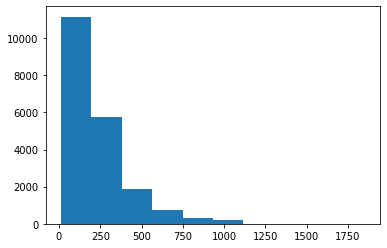

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.show()

- 짧은 단어 100개만 사용
 + 모든 길이를 100에 맞춘다.

- 원래는 문장의 길이가 가장 긴 쪽에 맞춰주는데 그러면 짧은 문장도 일일이 다 맞춰줘야 하기 때문에 메모리가 터진다고 함.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[5]) # 0으로 출력되는 건 maxlen=100보다 길었다.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
# 책 저자는 2 번의 출력과 3번의 출력 뒤가 같앗다는 걸 보여 주고 싶엇던 거 같다.
print(train_input[0][-10:])
print(train_seq[0]) 

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)
print(val_seq.shape)

(5000, 100)


#### 순환 신경망 만들기
- input_shape = (100, 500) 인 이유
 + 앞에 maxlen=100을 지정하였고, 데이터를 부를 때 500으로 지정했기 때문에 고유한 단어는 모두 500개! 즉, 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩토큰)에서 499까지이다.

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

- 원-핫 인코딩 적용
 + to_categorical() 함수 사용 : 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환 해준다.

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 순환 신경망 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 43s 126ms/step - loss: 0.6940 - accuracy: 0.5207 - val_loss: 0.6893 - val_accuracy: 0.5416
Epoch 2/100
313/313 [==============================] - 35s 113ms/step - loss: 0.6745 - accuracy: 0.5825 - val_loss: 0.6680 - val_accuracy: 0.6054
Epoch 3/100
313/313 [==============================] - 35s 110ms/step - loss: 0.6514 - accuracy: 0.6342 - val_loss: 0.6458 - val_accuracy: 0.6440
Epoch 4/100
313/313 [==============================] - 35s 111ms/step - loss: 0.6291 - accuracy: 0.6689 - val_loss: 0.6244 - val_accuracy: 0.6734
Epoch 5/100
313/313 [==============================] - 35s 112ms/step - loss: 0.6041 - accuracy: 0.7019 - val_loss: 0.5995 - val_accuracy: 0.7046
Epoch 6/100
313/313 [==============================] - 35s 111ms/step - loss: 0.5819 - accuracy: 0.7200 - val_loss: 0.5788 - val_accuracy: 0.7258
Epoch 7/100
313/313 [==============================] - 38s 121ms/step - loss: 0.5635 - accuracy: 0.7372 - val_loss: 0.5628 -

### 시각화
- 그래프에서 훈련 손실과 검증 손실의 훈련과정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

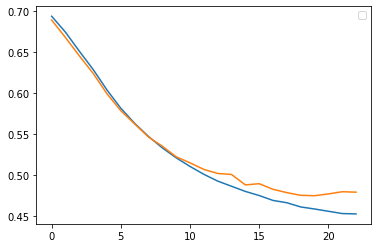

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

- 원핫 인코딩의 단점은 입력 데이터가 엄청 커진다. 그러므로 토큰 1개를 500차원으로 늘렸기에 대략 500배가 커졋다.
 + 훈련 데이터가 커질수록 문제!

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 단어 임배딩 사용
- keras.layers 패키지의 Embedding 클래스.
 + 처음에는 모든 벡터가 랜덤하게 초기화 되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습.
- 텍스트를 처리할 때 즐겨 사용하는 방법
- 각 단어를 고정된 크기의 실수 벡터로 바꿔줌.


- 두번째 순환 신경망(P. 515 설명 참조)

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

NameError: ignored

In [ ]:
model2.summary()

NameError: ignored

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

NameError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()